# _Assigment - 3_
## Apply k-NN on Amazon reviews data-set
##### Note: Used 5000 review 2500 positive and 2500 negative

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
#Hide Warnings in ipython notebook
import warnings
warnings.filterwarnings('ignore')

### Created Pickle file for amazon dataset with 2500 positive and 2500 negative response

In [2]:
df=pd.read_pickle('./Amazon_20000.pkl')
#sorting values TBS
df = df.sort_values(['Time'],ascending=True)

In [3]:
#Creating Train and test data (80-20 split, Since i ahve small dataset i need more data for taining
#                               therefore converted in 80-20 split instead of 70-30)
## 80% of sorted data will = Total number of rows (sorted) *0.8
X_train = df.iloc[:int(len(df)*.8),1] 
Y_train = df.iloc[:int(len(df)*.8),-1]
# len(Y_train)== len(X_train)
X_test = df.iloc[int(len(df)*.8)+1:,1] 
Y_test = df.iloc[int(len(df)*.8)+1:,-1]
# len(Y_test)== len(X_test)

In [4]:
# Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Ytrain = le.fit_transform(Y_train)
Ytest = le.transform(Y_test)

## BoW 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(X_train.values)
Xtest = vectorizer.transform(X_test.values)

In [6]:
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

from sklearn.model_selection import cross_val_score
import time

cv_scores = []
timelist=[] 


for k in range(1,100,2):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=10, scoring='accuracy')
    t=time.time() - start_time
#     print("Neighbour k = ",k,"; time taken",int(time.time() - start_time),'seconds;','Accuracy =',round(scores.mean()*100,2))
    t=time.time() - start_time
    timelist.append(t)
    
    cv_scores.append(scores.mean())

The optimal number of neighbors is 35


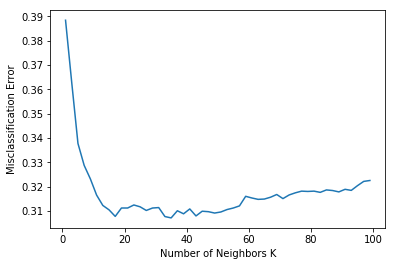

Training accuracy for K = 35 is 69.28


In [7]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
neighbors = list(range(1,100,2))
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print ("Training accuracy for K =",optimal_k,'is',round(max(cv_scores)*100,2) )

In [8]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
start_time = time.time()
knn.fit( Xtrain, Ytrain)
traingTime=time.time() - start_time

pred=knn.predict(Xtest)
acc_BoW=accuracy_score(Ytest,pred,normalize=True)
print('Test accuracy',round(acc_BoW*100,2),' for k=',optimal_k,'Average time taken training in (seconds)' 
      ,round(traingTime,4))

Test accuracy 69.17  for k= 35 Average time taken training in (seconds) 0.0057


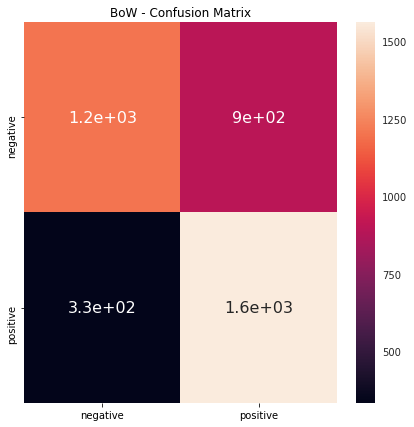

In [9]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Ytest, pred)
# CM.shape
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html
# https://stackoverflow.com/questions/46567449/set-a-string-as-index-of-pandas-dataframe

df_cm = pd.DataFrame(CM,columns=[le.inverse_transform(0),le.inverse_transform(1)]
                     ,index=[le.inverse_transform(0),le.inverse_transform(1)])
plt.figure(figsize = (7,7))
plt.title('BoW - Confusion Matrix')
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size


# TF-IDF

In [10]:
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
Xtrain_tf = tf_idf_vect.fit_transform(X_train.values)
Xtest_tf = tf_idf_vect.transform(X_test.values)

In [11]:
cv_scores_1 = []
timelist_1=[] 


for k in range(1,100,2):
    start_time = time.time()
    knn_1 = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn_1, Xtrain_tf, Ytrain, cv=10, scoring='accuracy')
    t=time.time() - start_time
#     print("Neighbour k = ",k,"; time taken",int(time.time() - start_time),'seconds;','Accuracy =',round(scores.mean()*100,2))
    t=time.time() - start_time
    timelist_1.append(t)
    
    cv_scores_1.append(scores.mean())

KeyboardInterrupt: 

In [ ]:
#  changing to misclassification error
MSE_1 = [1 - x for x in cv_scores_1]
neighbors_1 = list(range(1,100,2))
# determining best k
optimal_k_1 = neighbors[MSE_1.index(min(MSE_1))]
print ("The optimal number of neighbors is %d" % optimal_k_1)

# plot misclassification error vs k
plt.plot(neighbors_1, MSE_1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print ("Training accuracy for K =",optimal_k_1,'is',round(max(cv_scores_1)*100,2) )

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=optimal_k_1)
start_time = time.time()
knn_1.fit( Xtrain_tf, Ytrain)
predic=knn_1.predict(Xtest_tf)
acc_TF=accuracy_score(Ytest,predic,normalize=True)
print('Test accuracy',round(acc_TF*100,2),' for k=',optimal_k_1)

In [ ]:

CM_tf=confusion_matrix(Ytest, predic)
df_cmtf = pd.DataFrame(CM_tf,columns=[le.inverse_transform(0),le.inverse_transform(1)]
                     ,index=[le.inverse_transform(0),le.inverse_transform(1)])
plt.figure(figsize = (7,7))
plt.title('TF-IDF - Confusion Matrix')
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cmtf, annot=True,annot_kws={"size": 16})# font size


# Avg. W2V

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
def list_of_sent(df):
    i=0
    list_sent=[]
    for sent in df.values:
        filtered_sentence=[]
        for w in sent.split():
            for cleaned_words in w.split():
                if(cleaned_words.isalpha()):    
                    filtered_sentence.append(cleaned_words.lower())
                else:
                    continue 
        
        list_sent.append(filtered_sentence)
    
    return list_sent

In [ ]:
W2VTraining_list = list_of_sent(X_train)
W2VTest_list = list_of_sent(X_test)
# W2VTraining_list
list_all_words = list_of_sent(df['WoutStopWords'])

In [ ]:
w2v_model = Word2Vec(list_all_words,min_count=5,size=50, workers=4)
words = list(w2v_model.wv.vocab)
# print(len(words))

In [ ]:
Traing_vectors = []# the avg-w2v for each sentence/review is stored in this list
for sent in W2VTraining_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0 # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    Traing_vectors.append(sent_vec)
    

In [ ]:
cv_scores_2 = []
timelist_2=[] 


for k in range(1,100,2):
    start_time = time.time()
    knn_2 = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn_2, Traing_vectors, Ytrain, cv=10, scoring='accuracy')
    t=time.time() - start_time
#     print("Neighbour k = ",k,"; time taken",int(time.time() - start_time),'seconds;','Accuracy =',round(scores.mean()*100,2))
    t=time.time() - start_time
    timelist_2.append(t)
    
    cv_scores_2.append(scores.mean())

In [ ]:
MSE_2 = [1 - x for x in cv_scores_2]
neighbors_2 = list(range(1,100,2))
# determining best k
optimal_k_2 = neighbors[MSE_2.index(min(MSE_2))]
print ("The optimal number of neighbors is %d" % optimal_k_2)

# plot misclassification error vs k
plt.plot(neighbors_2, MSE_2)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print ("Training accuracy for K =",optimal_k_2,'is',round(max(cv_scores_2)*100,2) )

In [ ]:
Test_vectors = []# the avg-w2v for each sentence/review is stored in this list
for sent in W2VTest_list: # for each review/sentence
    i=0
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =1 # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
#     i+=1
    sent_vec /= cnt_words
    
#     print(i,'\t',cnt_words)
    Test_vectors.append(sent_vec)
    

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=optimal_k_2)
start_time = time.time()
knn_2.fit(Traing_vectors, Ytrain)
traingTime=time.time() - start_time
pred_avgw2v=knn_2.predict(Test_vectors)
acc_avgw2v=accuracy_score(Ytest,pred_avgw2v,normalize=True)
print('Test accuracy',round(acc_avgw2v*100,2),' for k=',optimal_k_2)

In [ ]:
CM_w2v=confusion_matrix(Ytest, pred_avgw2v)
df_cmw2v = pd.DataFrame(CM_w2v,columns=[le.inverse_transform(0),le.inverse_transform(1)]
                     ,index=[le.inverse_transform(0),le.inverse_transform(1)])
plt.figure(figsize = (7,7))
plt.title('Avg W2V - Confusion Matrix')
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cmw2v, annot=True,annot_kws={"size": 16})# font size

# TFIDF-W2V

In [ ]:
tfidf_feat = tf_idf_vect.get_feature_names() 
# tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_train_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in W2VTraining_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
#             print(vec)
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = Xtrain_tf[row, tfidf_feat.index(word)]
#             print(tfidf)
            sent_vec += (vec * tfidf)
#             print(sent_vec)
        
            weight_sum += tfidf
#             print(weight_sum)
        except:
            pass
    sent_vec /= weight_sum
#     print(sent_vec)
    tfidf_train_vectors.append(sent_vec)
    row += 1
    

In [ ]:
cv_scores_3 = []
timelist_3=[] 


for k in range(1,100,2):
    start_time = time.time()
    knn_3 = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn_3, tfidf_train_vectors, Ytrain, cv=10, scoring='accuracy')
    t=time.time() - start_time
#     print("Neighbour k = ",k,"; time taken",int(time.time() - start_time),'seconds;','Accuracy =',round(scores.mean()*100,2))
    t=time.time() - start_time
    timelist_3.append(t)
    
    cv_scores_3.append(scores.mean())
    

In [ ]:
MSE_3 = [1 - x for x in cv_scores_3]
neighbors_3 = list(range(1,100,2))
# determining best k
optimal_k_3 = neighbors[MSE_3.index(min(MSE_3))]
print ("The optimal number of neighbors is %d" % optimal_k_3)

# plot misclassification error vs k
plt.plot(neighbors_3, MSE_3)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
print ("Training accuracy for K =",optimal_k_3,'is',round(max(cv_scores_3)*100,2) )

In [ ]:
tfidf_test_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in W2VTest_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =1; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
#             print(vec)
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = Xtest_tf[row, tfidf_feat.index(word)]
#             print(tfidf)
            sent_vec += (vec * tfidf)
#             print(sent_vec)
        
            weight_sum += tfidf
#             print(weight_sum)
        except:
            pass
    sent_vec /= weight_sum
#     print(sent_vec)
    tfidf_test_vectors.append(sent_vec)
    row += 1
    

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=optimal_k_3)
start_time = time.time()
knn_3.fit(tfidf_train_vectors, Ytrain)
traingTime=time.time() - start_time
pred_tfidw2v=knn_3.predict(tfidf_test_vectors)
acc_tfidw2v=accuracy_score(Ytest,pred_tfidw2v,normalize=True)
print('Test accuracy',round(acc_tfidw2v*100,2),' for k=',optimal_k_3)

In [ ]:
CM_tfw2v=confusion_matrix(Ytest, pred_tfidw2v)
df_tfw2v = pd.DataFrame(CM_tfw2v,columns=[le.inverse_transform(0),le.inverse_transform(1)]
                     ,index=[le.inverse_transform(0),le.inverse_transform(1)])
plt.figure(figsize = (7,7))
plt.title('Avg W2V - Confusion Matrix')
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_tfw2v, annot=True,annot_kws={"size": 16})# font size

# __*RESULTS*__

In [ ]:
print("Vectroziation method \t optimal K \t Training Accuracy \t Test Accuracy")
print("-------------------- \t ----------\t ----------------- \t -------------")
print(" Bag of Words \t\t  ",optimal_k,'\t\t\t',round(max(cv_scores)*100,2),'\t\t  ',round((acc_BoW)*100,2))
print(" TFID         \t\t  ",optimal_k_1,'\t\t\t',round(max(cv_scores_1)*100,2),'\t\t  ',round((acc_TF)*100,2))
print(" TFID W2V     \t\t  ",optimal_k_2,'\t\t\t',round(max(cv_scores_2)*100,2),'\t\t  ',round((acc_avgw2v)*100,2))
print(" Avg W2V      \t\t  ",optimal_k_3,'\t\t\t',round(max(cv_scores_3)*100,2),'\t\t  ',round((acc_tfidw2v)*100,2))


In [ ]:
# https://www.kaggle.com/andyxie/matplotlib-plot-multiple-lines
plt.figure(figsize = (10,10))

plt.plot(MSE, label="BoW")
plt.plot(MSE_1, label="TF-IDF")
plt.plot(MSE_2, label="Avg W2V")
plt.plot(MSE_3, label="TFIDF W2V")
# Add legend
plt.legend(loc='Top left')
# Add title and x, y labels
plt.title("Camparing Accuracy of Diff. Tech.", fontsize=15, fontweight='bold')
plt.suptitle("Performance comparision", fontsize=10)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()